# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

First I created a new kernel to run Pycaret

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\danir\OneDrive\Desktop\CHURN.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [22]:
!jupyter kernelspec list #Available kernels

Available kernels:
  danir      C:\Users\danir\AppData\Roaming\jupyter\kernels\danir
  pyra       C:\Users\danir\AppData\Roaming\jupyter\kernels\pyra
  python3    C:\Users\danir\anaconda3\share\jupyter\kernels\python3


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [3]:
df.info() #data set looks accurate

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [4]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

# Summary

In [5]:
automl = ClassificationExperiment() 

In [6]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,519
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Numeric features,3
9,Categorical features,3


Target is churn. There are training (4930) and testing sets (2113) for model evaluation. Mean and mode were used. 

In [7]:
automl

In [8]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8024,0.8402,0.8024,0.7941,0.7959,0.4631,0.4674,0.4870
gbc,Gradient Boosting Classifier,0.7978,0.8393,0.7978,0.7875,0.7892,0.4425,0.4487,0.0940
ada,Ada Boost Classifier,0.7976,0.8386,0.7976,0.7872,0.7887,0.4411,0.4475,0.0490
ridge,Ridge Classifier,0.7974,0.8290,0.7974,0.7858,0.7864,0.4320,0.4412,0.0290
lda,Linear Discriminant Analysis,0.7953,0.8290,0.7953,0.7872,0.7895,0.4478,0.4510,0.0270
lightgbm,Light Gradient Boosting Machine,0.7901,0.8263,0.7901,0.7810,0.7835,0.4315,0.4349,0.2020
knn,K Neighbors Classifier,0.7763,0.7513,0.7763,0.7634,0.7665,0.3821,0.3875,0.4530
rf,Random Forest Classifier,0.7704,0.7956,0.7704,0.7601,0.7632,0.3780,0.3813,0.0920
et,Extra Trees Classifier,0.7604,0.7742,0.7604,0.7530,0.7559,0.3639,0.3652,0.0830
dt,Decision Tree Classifier,0.7359,0.6655,0.7359,0.7363,0.7360,0.3233,0.3235,0.0280


The best model to use is logistic regression with 80% accuracy. Random forest and decision trees came in the lowest for performance. Logistic regression was the highest precision or identifying those that actually churn which is important.  

In [9]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=519, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

This is showing that LR is the best model

In [10]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This is an AUC model. It shows the 0 curve which predicts customers who didnt churn at 82% and those that did churn at 82%. It also shows how both classes do and it is higher than the individual classes which indicates that it is good at predicting both https://www.statology.org/interpret-roc-curve/ 

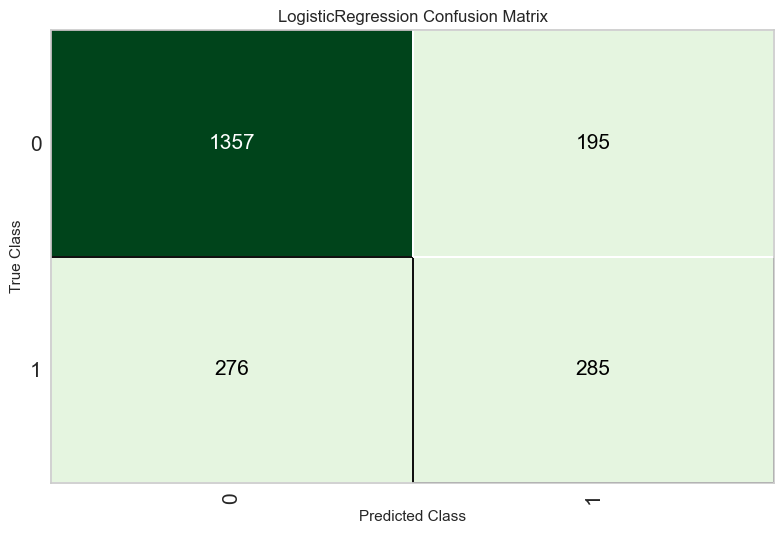

In [11]:
automl.plot_model(best_model, plot = 'confusion_matrix')

0 No Churn
1 Churn
The top left indicates those who did not churn that were correctly classified
Bottom left is those that Did churn that were correclty classified
Top right is those who did not churn incorrectly labeled as churning
Bottom right those that churned that were incorrectly labeled as not churning

Overall it still seems to have a high number of correct predictions but it is still concerning that it is missing a high number of customers that did churn


In [12]:
df.iloc[-2:-1].shape # 1 row 7 columns

(1, 7)

In [13]:
df.iloc[-1].shape # Number of elements

(7,)

In [14]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5181


Makes predictions using the best model on the last row. This customer is likely to churn being over 0.5

In [15]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7955,0.8364,0.7955,0.7867,0.7894,0.4469,0.4500


Accuracy 79% AUC churn vs non churn 83% recall churn correctly identified 79% , precision those that churned that actually chruned 78%, F1 balanced 78%, kappa beyond chance 44%, MCC correlation 45%

In [16]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,Yes,0.6005
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.9365
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,No,0.6039
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,0.9366
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,Yes,0.6423


This allows us to look at patterns. Those with a contract are labeled as no churn. Longer tenure is also associated with not churning. It also looks like higher monthly charges are likely to churn.

In [17]:
automl.save_model(best_model, 'churn_model') # saves the model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [18]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('churn_model') # loads model

Transformation Pipeline and Model Successfully Loaded


In [19]:
new_pycaret.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5181


Puts in data using the new trained model. 

In [20]:
from IPython.display import Code

Code('predict_churn.py')

#runs new script

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('churn_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'Label': 'Churn'}, axis=1, inplace=True)
    predictions['prediction_label'].replace({1: 'Churn', 0: 'No Churn'},
                                            inplace=True)
    return predictions['prediction_label']


if __name__ == "__main__":
    # Same indentation level as "if" statement
    df = load_data('../Downloads/new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [21]:
%run predict_churn.py
# Runs model with the new churn data


Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
9305-CKSKC    Yes
1452-KNGVK    Yes
6723-OKKJM     No
7832-POPKP     No
6348-TACGU    Yes
Name: prediction_label, dtype: object


<Figure size 800x550 with 0 Axes>

0 No churn
1 Churn
1 correct,0 incorrect,0 correct,1 incorrect,0 incorrect
The model is not running all the way correct. But I think it would need more data to see how it actually does overall to make a decision. 

This assignment was my most challenging, but it was helpful to see where code could go wrong and what exactly it is looking at. I enjoyed learning how to enter the command prompt and create a new kernel. 
The target for this assignment was churn, and the automl chose logistic regression as the best model overall. It had high accuracy and AUC. The automl allows us to look at patterns in the data to see what might be causing churn vs. no churn. The data still shows that having a contract and long tenure causes customers to refrain from churning. 
I had some trouble modifying the script but was able to fix some mistakes, and it ran. It is running only partially correct, but it may run better with more data input. 